# GRUPO 2
# INTEGRANTES:
1. Diego Villegas
2. 
3.
4.


Lo primero que se hace en el trabajo es importar las bibliotecas necesarias para el análisis de datos y la visualización.

Se importa:
* time, que se utilizará para trabajar con intervalos y tiempos, se realizará análisis temporales o para medir la duración de ciertos procesos dentro del análisis.
* pandas, para la manipulación y análisis de estructuras de datos en forma de tablas (DataFrames), es posible limpiar, transformar y analizar grandes volúmenes de datos de manera eficiente
* seaborn, que se utilizará para la creación de gráficos estadísticos de forma atractiva y sencilla
* matplotlib.pyplot es importado para generar gráficos personalizados
* numpy, para trabajar con datos numéricos de manera eficiente, ofrece poderosas funciones matemáticas y herramientas para la manipulación de arreglos multidimensionales
* psycopg2, para conectarse a bases de datos PostgreSQL y ejecutar consultas SQL
* json, para manejar datos en formato JSON, útil para leer y escribir archivos JSON
* datetime, módulo que permite trabajar con fechas y horas en Python

In [2]:
import time
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import psycopg2
import json
from datetime import datetime


Se continua midiendo el tiempo que tarda en cargar un archivo CSV. 

Primero, se almacena el tiempo de inicio utilizando time.time() en la variable start.

Luego, se especifica la ruta del archivo CSV ('Global_Cybersecurity_Threats_2015-2024.csv') y se lee este archivo con la función pd.read_csv(), utilizando una coma como separador (que es el valor por defecto en archivos CSV). 

El archivo se carga en un DataFrame de Pandas llamado df para terminar almacenando el tiempo de finalización en la variable end.



In [3]:
inicio = time.time()

# File path to data
csv_path = 'Global_Cybersecurity_Threats_2015-2024.csv'

# Specify the separator
df = pd.read_csv(csv_path, sep=',')

fin = time.time()



A continuación se mide el tiempo que toma cargar un archivo CSV utilizando la función pd.read_csv(), calculando la diferencia entre el tiempo de inicio y el de finalización, y luego imprime ese tiempo en segundos.

El mensaje impreso indica que la lectura del archivo ha tomado aproximadamente 0.0082 segundos.

In [4]:
print("Tiempo con bucle for:", fin - inicio, "segundos")

Tiempo con bucle for: 0.03848886489868164 segundos


El comando df.head() muestra las primeras cinco filas del DataFrame df, que contiene información sobre ciberataques ocurridos entre 2015 y 2024.

Cada fila representa un incidente de ciberseguridad y las columnas incluyen detalles como el país, año, tipo de ataque, industria afectada, pérdidas financieras, número de usuarios afectados, fuente del ataque, vulnerabilidad de seguridad, mecanismos de defensa utilizados y el tiempo de resolución del incidente en horas.

In [5]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


El siguiente código muestra el número total de registros (filas) en el DataFrame df.

El atributo shape de un DataFrame devuelve una tupla que contiene el número de filas y columnas, y al usar df.shape[0], se obtiene el total de registros. 

En este caso, el mensaje impreso indica que hay 3000 registros en el conjunto de datos.

In [6]:
print("Número de registros:", df.shape[0])


Número de registros: 3000


Para el caso de estudio, se insertarán datos duplicados, datos faltantes e incompletos, y se mezclarán mayúsculas y minúsculas en las entradas. Además, se introducirán valores nulos y años incorrectos, con el fin de simular un escenario más realista en el que los datos pueden contener inconsistencias y errores, con esto es necesario un proceso de limpieza y preprocesamiento para garantizar la calidad y precisión del análisis posterior.

El siguiente código simula un caso de estudio en el que se introducen diversas inconsistencias en un conjunto de datos de ciberseguridad para poder realizar un análisis de limpieza y preprocesamiento de datos.

1. Insertar datos duplicados: se seleccionan 200 filas aleatorias del DataFrame df y se duplican mediante el uso de df.sample(n=200, replace=True), luego esas filas duplicadas se concatenan con el DataFrame original utilizando pd.concat([df, df_duplicados]), aumentando así el número de registros.

2. Insertar valores NaN (incompletos) aleatorios: se generan índices aleatorios en los que se insertarán valores nulos (NaN) en las columnas 'Financial Loss (in Million $)' e 'Incident Resolution Time (in Hours)', representando datos faltantes o incompletos.
  
3. Mezclar mayúsculas y minúsculas en algunas columnas de texto: se aplica una transformación aleatoria en las columnas de texto (como 'Attack Type', 'Target Industry', 'Security Vulnerability Type', y 'Defense Mechanism Used') para mezclar mayúsculas y minúsculas.

4. Insertar valores nulos en algunas columnas de manera aleatoria: se insertan valores nulos (NaN) en las columnas 'Attack Source' y 'Country' generando datos incompletos.

5. Introducir valores inconsistentes en algunas columnas: en la columna 'Year'*, se insertan valores incorrectos, como años futuros e incluso años negativos o irreales, y también en la columna 'Number of Affected Users', se generan valores inconsistentes como 0 o valores negativos

6. Generar más registros aleatorios: se generan 1,000 registros adicionales con datos aleatorios para las distintas columnas del DataFrame utilizando valores predefinidos o generados aleatoriamente para cada columna.

In [7]:
# Generar un DataFrame con 1000 registros aleatorios
np.random.seed(42)
num_registros = 1000


paises = ['China', 'India', 'UK', 'Germany', 'USA', 'Russia', 'Brazil', 'Australia', 'CHIna', 'CHINA', 'RUSSIA', 'uk']
tipos_ataque = ['Phishing', 'Ransomware', 'Man-in-the-Middle', 'DDoS', 'SQL Injection', 'Cross-Site Scripting']
industrias = ['Education', 'Retail', 'IT', 'Telecommunications', 'Healthcare', 'Finance', 'Government']
origen_ataque = ['Hacker Group', 'Nation-state', 'Insider', 'Script Kiddie', 'Unattributed']
tipos_vulnerabilidad = ['Unpatched Software', 'Weak Passwords', 'Social Engineering', 'Zero-Day', 'Misconfiguration']
mecanismo_defensa = ['VPN', 'Firewall', 'AI-based Detection', 'IDS/IPS', 'Antivirus', 'Encryption']


# 1. Insertar datos duplicados
df_duplicados = df.sample(n=200, replace=True)
df = pd.concat([df, df_duplicados])

# 2. Insertar valores NaN (incompletos) aleatorios en algunas columnas
# 5% de valores NaN aleatorios
nan_indices = np.random.choice(df.index, size=int(num_registros * 0.05), replace=False)
df.loc[nan_indices, 'Financial Loss (in Million $)'] = np.nan
df.loc[nan_indices, 'Incident Resolution Time (in Hours)'] = np.nan

# 3. Mezclar mayúsculas y minúsculas en algunas columnas de texto
df['Attack Type'] = df['Attack Type'].apply(lambda x: x.lower() if np.random.rand() > 0.5 else x.upper())
df['Target Industry'] = df['Target Industry'].apply(lambda x: x.lower() if np.random.rand() > 0.5 else x.upper())
df['Security Vulnerability Type'] = df['Security Vulnerability Type'].apply(lambda x: x.lower() if np.random.rand() > 0.5 else x.upper())
df['Defense Mechanism Used'] = df['Defense Mechanism Used'].apply(lambda x: x.lower() if np.random.rand() > 0.5 else x.upper())

# 4. Insertar valores nulos en algunas columnas de manera aleatoria
# 3% de Attack Source nulos
df.loc[np.random.choice(df.index, size=int(num_registros * 0.03), replace=False), 'Attack Source'] = np.nan
# 3% de Country nulos
df.loc[np.random.choice(df.index, size=int(num_registros * 0.03), replace=False), 'Country'] = np.nan

# 5. Introducir valores inconsistentes en algunas columnas
# Inconsistencia en el año
df.loc[::10, 'Year'] = np.random.choice([2024, 2025, 2026], size=int(len(df) / 10))  
# Años negativos, con un dígito y mayores que 2025
df.loc[::20, 'Year'] = np.random.choice([-1, 9, 3000, 2025], size=int(len(df) / 20))
df.loc[::30, 'Year'] = np.random.choice([2024, 2025, 2026, 999], size=len(df.loc[::30]))
# Inconsistencias en afectados (valores negativos o cero)
df.loc[::20, 'Number of Affected Users'] = np.random.choice([0, -1], size=int(len(df) / 20))
                                                            
# Generar más registros aleatorios (otros 1,000 registros)
df_nuevo = pd.DataFrame({
    'Country': np.random.choice(paises, 1000),
    'Year': np.random.choice([2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2030], 1000),
    'Attack Type': np.random.choice(tipos_ataque, 1000),
    'Target Industry': np.random.choice(industrias, 1000),
    'Financial Loss (in Million $)': np.random.uniform(10, 200, 1000),
    'Number of Affected Users': np.random.randint(1000, 1000000, 1000),
    'Attack Source': np.random.choice(origen_ataque, 1000),
    'Security Vulnerability Type': np.random.choice(tipos_vulnerabilidad, 1000),
    'Defense Mechanism Used': np.random.choice(mecanismo_defensa, 1000),
    'Incident Resolution Time (in Hours)': np.random.randint(1, 100, 1000)
})

# Agregar los 1,000 nuevos registros
df = pd.concat([df, df_nuevo], ignore_index=True)


Después de introducir los datos inconsistentes, verificamos la cantidad total de registros en el DataFrame. Al hacerlo, observamos que el número de registros ha aumentado debido a la inserción de 200 registros duplicados, la adición de valores faltantes (NaN) en varias columnas, la mezcla aleatoria de mayúsculas y minúsculas en las entradas de texto, y la inserción de valores nulos en algunas columnas específicas.

Además, se generaron 1,000 registros nuevos con datos aleatorios.

In [8]:
print("Número de registros:", df.shape[0])


Número de registros: 4200


El comando df.dtypes muestra los tipos de datos de cada columna en el DataFrame df, teniendo como resultado que las columnas 'Country', 'Attack Type', 'Target Industry', 'Attack Source', 'Security Vulnerability Type' y 'Defense Mechanism Used' son de tipo object, es decir que contienen cadenas de texto, mientras que las columnas 'Year' y 'Number of Affected Users' son de tipo int64, representando números enteros, a diferencia de las columnas 'Financial Loss (in Million $)' e 'Incident Resolution Time (in Hours)' son de tipo float64, indicando que contienen valores numéricos decimales.

In [9]:
df.dtypes

Country                                 object
Year                                     int64
Attack Type                             object
Target Industry                         object
Financial Loss (in Million $)          float64
Number of Affected Users                 int64
Attack Source                           object
Security Vulnerability Type             object
Defense Mechanism Used                  object
Incident Resolution Time (in Hours)    float64
dtype: object

Para una mayor comprensión se procede a renombrar las columnas del DataFrame df para traducir los nombres de las columnas del inglés al español.

In [10]:
df = df.rename(columns={"Country": "País", 
                        "Year": "Año", 
                        "Attack Type": "Tipo ataque", 
                        "Target Industry": "Industria objetivo",
                        "Financial Loss (in Million $)": "Pérdida financiera", 
                        "Number of Affected Users": "Número usuarios afectados",
                        "Attack Source": "Origen ataque",
                        "Security Vulnerability Type": "Tipo vulnerabilidad",
                        "Defense Mechanism Used": "Mecanismo defensa",
                        "Incident Resolution Time (in Hours)": "Tiempo de resolución"
                       })


## PRE-PROCESAMIENTO DE TEXTO

El comando df.duplicated().sum() devuelve el número de filas duplicadas en el DataFrame df, en este caso el resultado es 7, lo que significa que hay 7 filas duplicadas en el conjunto de datos. 

In [11]:
df.duplicated().sum()

7

El comando df = df.drop_duplicates() elimina las filas duplicadas del DataFrame df, este método elimina todas las filas que son exactamente iguales a otras, conservando solo la primera ocurrencia de cada conjunto de duplicados. Después de ejecutar este código, el DataFrame df ya no tendrá registros duplicados, lo que garantiza que cada fila sea única.

In [12]:
df = df.drop_duplicates()


El comando df.isnull().sum() muestra la cantidad de valores nulos en cada columna del DataFrame df. Se observa que la columna 'País' tiene 31 valores nulos, 'Pérdida financiera' y 'Tiempo de resolución' tienen 58 valores nulos cada una, y 'Origen ataque' tiene 35 valores nulos. Las demás columnas como 'Año', 'Tipo ataque', 'Industria objetivo', 'Número usuarios afectados', 'Tipo vulnerabilidad', y 'Mecanismo defensa' no contienen valores nulos.

In [13]:
df.isnull().sum()

País                         31
Año                           0
Tipo ataque                   0
Industria objetivo            0
Pérdida financiera           58
Número usuarios afectados     0
Origen ataque                35
Tipo vulnerabilidad           0
Mecanismo defensa             0
Tiempo de resolución         58
dtype: int64

El código df['Pérdida financiera'] = df['Pérdida financiera'].fillna(df['Pérdida financiera'].mean()) rellena los valores nulos en la columna 'Pérdida financiera' con la media de esa columna. De manera similar, df['Tiempo de resolución'] = df['Tiempo de resolución'].fillna(df['Tiempo de resolución'].median()) reemplaza los valores nulos en la columna 'Tiempo de resolución' con la mediana de esa columna. Este enfoque ayuda a manejar los valores faltantes de una manera coherente, utilizando la media para columnas numéricas continuas y la mediana para columnas con valores que pueden tener una distribución sesgada, lo que asegura que los valores imputed sean representativos y no distorsionen los análisis.

LA PERDIDA FINANCIERA SE RELLENA CON LA MEDIA DE LOS DEMAS REGISTROS NO NULOS
EL TIEMPO DE RESOLUCION SE LLENA CON LA MEDIANA

In [14]:
df['Pérdida financiera'] = df['Pérdida financiera'].fillna(df['Pérdida financiera'].mean())
df['Tiempo de resolución'] = df['Tiempo de resolución'].fillna(df['Tiempo de resolución'].median())  # Rellenar con la mediana


SE CUENTAN LOS REGISTROS PARA VER SI CAMBIO AL INICIO, SE DEBE TENER MAS PORQUE SE SIMULO DATOS NO PREPROCESADOS, ESTO SE HIZO PORQUE EL DATASET DE KAGGLE NO TUVO DATOS NULOS NI VACIOS NI FALTANTES NI ERRONEOS

In [15]:
print("Número de registros:", df.shape[0])


Número de registros: 4193


SE CUENTA CUANTOS DATOS TIENEN FILAS NULAS
se puede OBSERVAR QUE PAIS TIENE 31 FILAS NULOS, MIENTRAS QUE............

In [16]:
df.isnull().sum()

País                         31
Año                           0
Tipo ataque                   0
Industria objetivo            0
Pérdida financiera            0
Número usuarios afectados     0
Origen ataque                35
Tipo vulnerabilidad           0
Mecanismo defensa             0
Tiempo de resolución          0
dtype: int64

SE RELLENA LOS QUE SON NULOS EN PAIS Y ORIGIN ATAQUE COMO DESCONOCIDO.........

In [17]:
df['País'] = df['País'].fillna('Desconocido')
df['Origen ataque'] = df['Origen ataque'].fillna('Desconocido')


SE VERIFICA VALORES UNICOS DE PAIS Y SE OBSERVA QUE ENTRE MAYUSCULAS Y MINUSCULAS DIFERE PORQUE.........

In [18]:
df["País"].unique()


array(['China', 'India', 'UK', 'Germany', 'France', 'Australia', 'Russia',
       'Brazil', 'Japan', 'USA', 'Desconocido', 'RUSSIA', 'uk', 'CHINA',
       'CHIna'], dtype=object)

SE VERIFICA AÑO PARA....... Y SE OBSERVA QUE........

In [19]:
df["Año"].unique()


array([ 999, 2019, 2017, 2024, 2018, 2016, 2023, 2026, 2022, 2015, 3000,
       2021, 2020, 2025,    9,   -1, 2030])

LO MISMO QUE PARA PAIS

In [20]:
df["Tipo ataque"].unique()

array(['PHISHING', 'ransomware', 'man-in-the-middle', 'RANSOMWARE',
       'DDOS', 'SQL INJECTION', 'ddos', 'phishing', 'MAN-IN-THE-MIDDLE',
       'MALWARE', 'malware', 'sql injection', 'Phishing',
       'Man-in-the-Middle', 'SQL Injection', 'Ransomware',
       'Cross-Site Scripting', 'DDoS'], dtype=object)

LO MISMO QUE PARA TIPO DE ATAQUE

In [21]:
df["Industria objetivo"].unique()

array(['EDUCATION', 'retail', 'IT', 'telecommunications', 'it', 'RETAIL',
       'TELECOMMUNICATIONS', 'government', 'banking', 'HEALTHCARE',
       'healthcare', 'BANKING', 'GOVERNMENT', 'education', 'Healthcare',
       'Telecommunications', 'Education', 'Government', 'Retail',
       'Finance'], dtype=object)

LO MISMO QUE PARA INDUSTRIA OBJETIVO

In [22]:
df["Origen ataque"].unique()

array(['Hacker Group', 'Nation-state', 'Insider', 'Unknown',
       'Desconocido', 'Script Kiddie', 'Unattributed'], dtype=object)

LO MISMO QUE PARA ORIGEN ATAQUE

In [23]:
df["Tipo vulnerabilidad"].unique()

array(['unpatched software', 'UNPATCHED SOFTWARE', 'weak passwords',
       'social engineering', 'SOCIAL ENGINEERING', 'ZERO-DAY', 'zero-day',
       'WEAK PASSWORDS', 'Misconfiguration', 'Zero-Day',
       'Social Engineering', 'Weak Passwords', 'Unpatched Software'],
      dtype=object)

LO MISMO......

In [24]:
df["Mecanismo defensa"].unique()

array(['VPN', 'firewall', 'vpn', 'AI-BASED DETECTION', 'antivirus',
       'ANTIVIRUS', 'FIREWALL', 'encryption', 'ENCRYPTION',
       'ai-based detection', 'IDS/IPS', 'Firewall', 'Antivirus',
       'Encryption', 'AI-based Detection'], dtype=object)

COMO SE CONOCE QUE LA BASE ES DESDE EL 2015 AL 2024 SE FILTRA POR ESTOS AÑOS, Y SE TOMA SOLO LOS REGISTROS 

In [25]:
df = df[(df['Año'] >= 2015) & (df['Año'] <= 2024)]

SE TRANSFORMA LAS VARIABLES OBJECT EN MAYUSCULAS

In [26]:
df = df.map(lambda x: x.upper() if isinstance(x, str) else x)

SE VERIFICA PERDIDAS FINANCIERAS, NO IMPORTA SI SE REPITE PORQUE.......

In [27]:
print(df['Pérdida financiera'].unique())

[ 62.19        38.65        41.44       ... 187.26412415 163.08259253
 191.30897169]


AL TERMINAR SE CUENTA CON 3808 REGISTROS, DESPUES DEL PREPROCESAMIENTO PORQUE..... PARA

In [28]:
print("Número de registros:", df.shape[0])


Número de registros: 3808


Este análisis describe cómo varían los datos en cuatro categorías clave: el año del ataque, las pérdidas financieras, el número de usuarios afectados y el tiempo de resolución. En promedio, los ataques ocurrieron entre 2015 y 2024, con más casos recientes en 2020. Las pérdidas económicas promedio fueron de 50.49 unidades monetarias, aunque pueden ir desde 0.5 hasta casi 100. El número de usuarios afectados varía mucho, con un promedio de 504,684 personas, pero algunos ataques afectaron a casi un millón. Finalmente, resolver un ataque toma en promedio 36 días, aunque en algunos casos puede solucionarse en solo 1 día o tardar hasta 72 días.

In [29]:
df.describe()

,Año,Pérdida financiera,Número usuarios afectados,Tiempo de resolución
count,3808.000000,3808.000000,3808.000000,3808.00000
mean,2019.842437,63.504665,497637.858981,39.25105
std,2.788747,43.130283,289214.905992,23.14541
min,2015.000000,0.500000,-1.000000,1.00000
25%,2018.000000,30.675000,248423.500000,20.00000
50%,2020.000000,59.260452,498039.500000,38.00000
75%,2022.000000,85.290000,749406.250000,57.00000
max,2024.000000,199.966211,999635.000000,99.00000


La matriz de correlación sugiere que no hay una relación directa y predecible entre el año del ataque y variables clave como las pérdidas financieras, el número de usuarios afectados o el tiempo de resolución, lo que podría indicar que, aunque los ataques pueden ocurrir a lo largo del tiempo, no necesariamente se correlacionan de forma lineal con el impacto económico o el alcance de los afectados. Además, el hecho de que el tiempo de resolución tenga una correlación baja con las pérdidas financieras ....................... que el proceso de resolución no siempre se ajusta directamente a la magnitud del daño causado, lo que podría reflejar diferencias en la eficacia de las medidas de defensa o la naturaleza del ataque.

In [30]:
# Seleccionar solo las columnas numéricas
numericas_df = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
matriz_correlacion = numericas_df.corr()

matriz_correlacion

,Año,Pérdida financiera,Número usuarios afectados,Tiempo de resolución
Año,1.000000,0.062729,-0.014458,0.024013
Pérdida financiera,0.062729,1.000000,-0.004529,0.144563
Número usuarios afectados,-0.014458,-0.004529,1.000000,-0.004284
Tiempo de resolución,0.024013,0.144563,-0.004284,1.000000


EN LOS GRAFICOS SE PUEDE OBSERVAR QUE:
1. GRAFICO 1
2. GRAFICO 2
3. GRAFICO 3 
4. GRAFICO 4



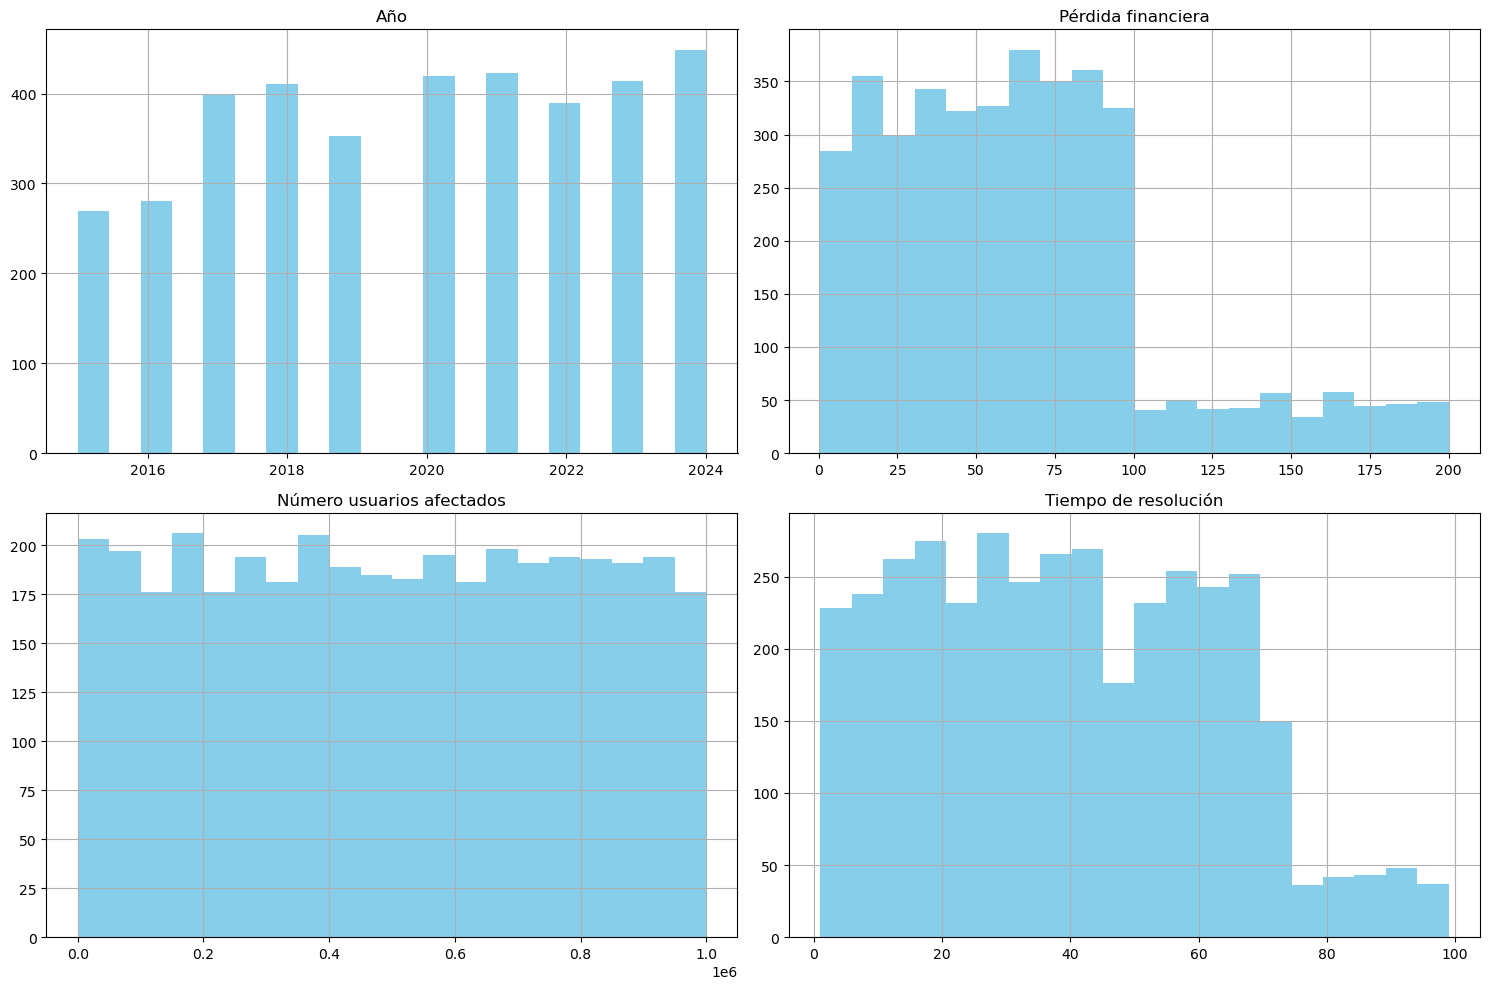

In [31]:
df.hist(figsize=(15, 10), bins=20, color='skyblue')
plt.tight_layout()
plt.show()

EVOLUCION DE ATAQUE SPOR AÑO
EJE X AÑO, EJE Y NUMERO DE ATAQUES

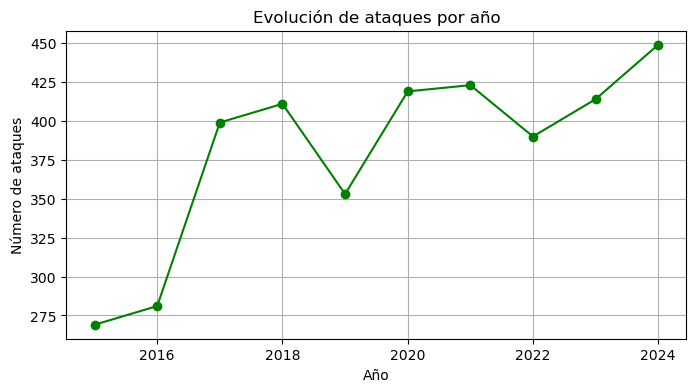

In [32]:
df['Año'].value_counts().sort_index().plot(kind='line', marker='o', color='green', figsize=(8,4))
plt.title("Evolución de ataques por año")
plt.ylabel("Número de ataques")
plt.xlabel("Año")
plt.grid(True)
plt.show()


INDUSTRIAS MAS ATAQUES, TOP 10 PAISES, CADA PAIS SE PUEDE OBSERVAR TAQUES SEGUN INDUSTRIA

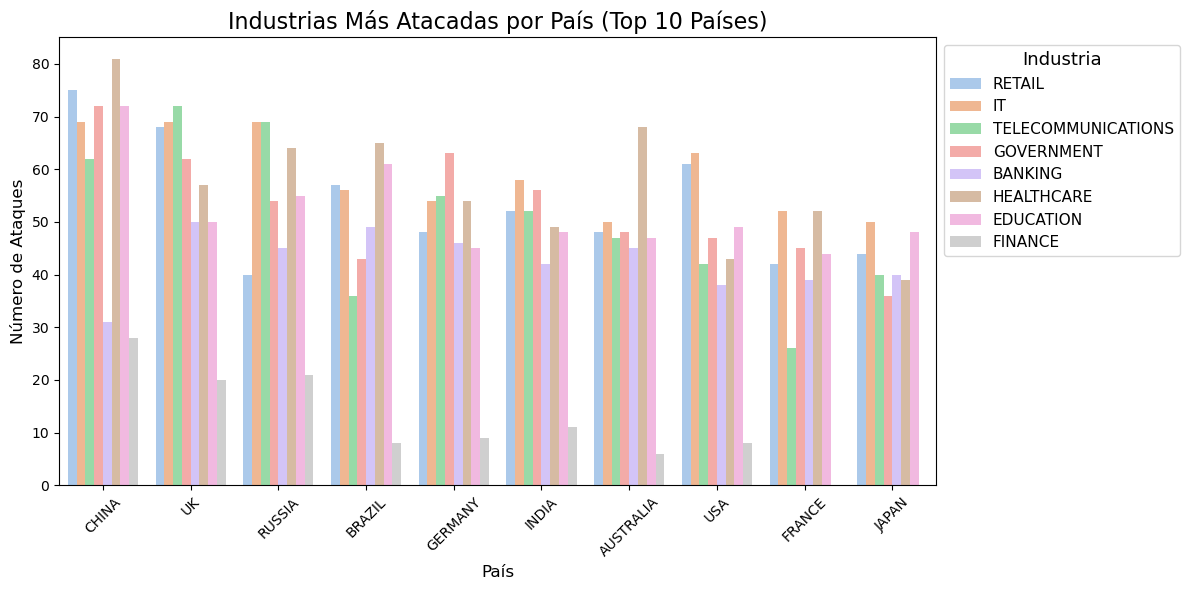

In [33]:
sns.set_palette("pastel")

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='País', hue='Industria objetivo', order=df['País'].value_counts().index[:10])

plt.title("Industrias Más Atacadas por País (Top 10 Países)", fontsize=16)
plt.xticks(rotation=45)
plt.xlabel("País", fontsize=12)
plt.ylabel("Número de Ataques", fontsize=12)

plt.legend(title="Industria", bbox_to_anchor=(1,1), title_fontsize='13', fontsize='11')

plt.tight_layout()
plt.show()


PERDIDA FINANCIERA POR TIPO DE ATAQUE Y AÑO
EJE X AÑO, CADA BARRA ESTA DIVIDA POR TIPO DE ATAQUE, DONDE SE PUEDE OBSERVAR QUE......
EJE Y PERDIDA FINANICERA EN MILLONES

<Figure size 1200x600 with 0 Axes>

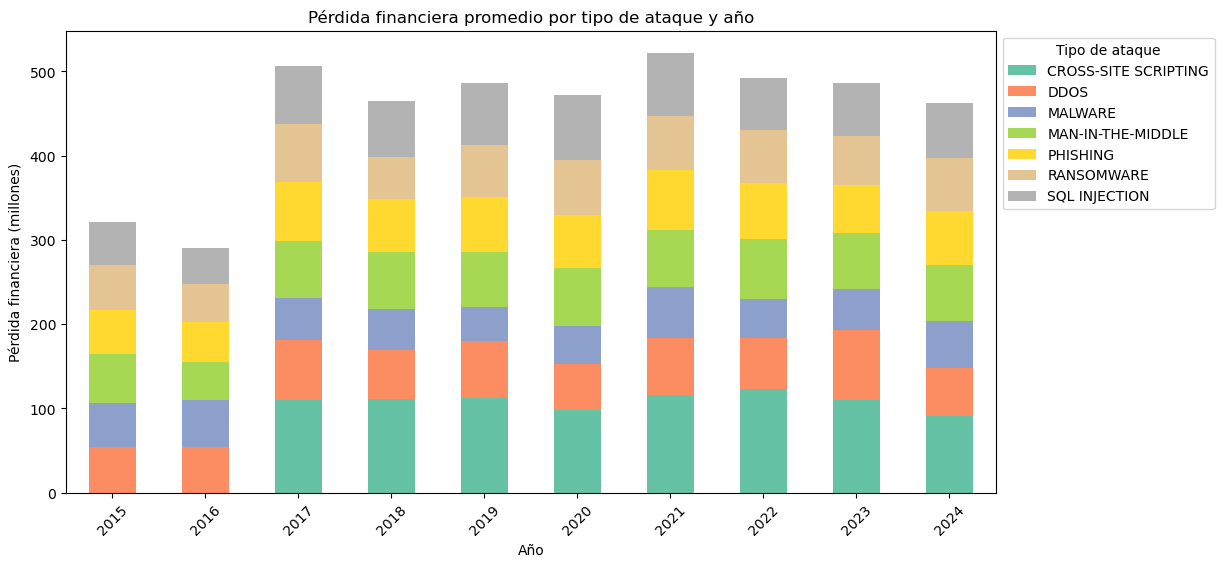

In [34]:
plt.figure(figsize=(12,6))
df_agrupado = df.groupby(['Año', 'Tipo ataque'])['Pérdida financiera'].mean().unstack()

df_agrupado.plot(kind='bar', stacked=True, colormap='Set2', figsize=(12,6))
plt.title("Pérdida financiera promedio por tipo de ataque y año")
plt.ylabel("Pérdida financiera (millones)")
plt.xlabel("Año")
plt.legend(title="Tipo de ataque", bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.show()


CADA LINEA REPRESANTO TIPO DE ATAQUE, PODEMOS VER EN EL CUADRO DERECHA, EN EL EJE Y PERDIDA FINANICERA EN MILONES

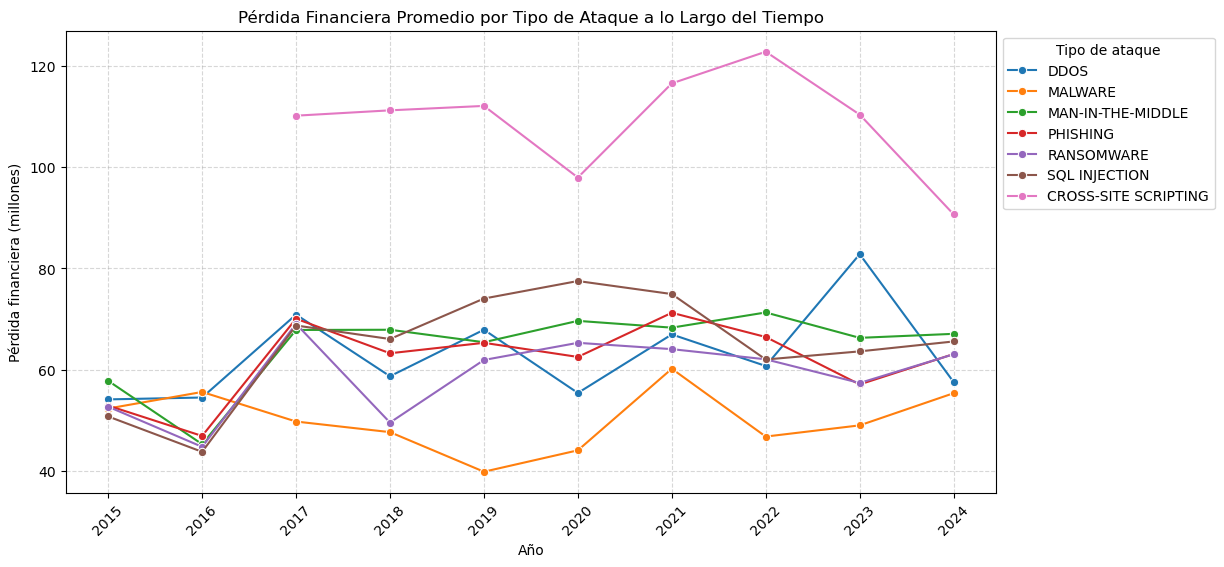

In [35]:

plt.figure(figsize=(12,6))
df_agrupado = df.groupby(['Año', 'Tipo ataque'])['Pérdida financiera'].mean().reset_index()

sns.lineplot(data=df_agrupado, x='Año', y='Pérdida financiera', hue='Tipo ataque', marker='o', palette='tab10')

plt.title("Pérdida Financiera Promedio por Tipo de Ataque a lo Largo del Tiempo")
plt.ylabel("Pérdida financiera (millones)")
plt.xlabel("Año")
plt.xticks(df_agrupado['Año'].unique(), rotation=45)
plt.legend(title="Tipo de ataque", bbox_to_anchor=(1,1))
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


SE AGRUPA POR PERDIDA FINANCIERA Y TIPO DE ATAQUE, SE MUESTRA TIPO DE ATAQUE CON MAYOR PERDIDA FINANCIERA
Tipo ataque
SQL INJECTION    43712.112779
Name: Pérdida financiera, dtype: float64

SE OBSERVA QUE.......... POR LO QUE...........



Tipo ataque
SQL INJECTION    43712.112779
Name: Pérdida financiera, dtype: float64


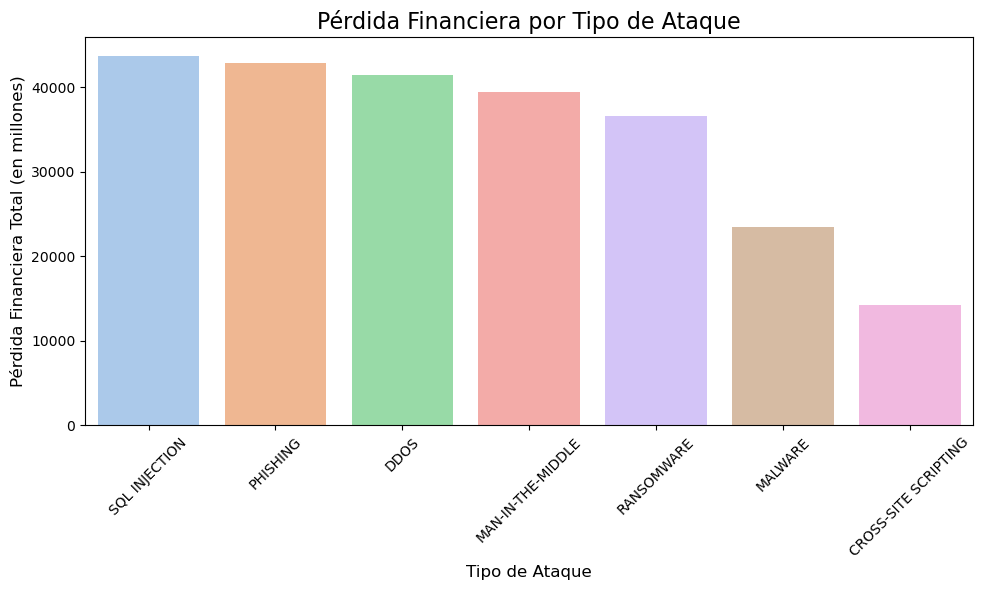

In [36]:
ataque_perdida = df.groupby('Tipo ataque')['Pérdida financiera'].sum().sort_values(ascending=False)

print(ataque_perdida.head(1))

plt.figure(figsize=(10,6))

sns.barplot(
    x=ataque_perdida.index, 
    y=ataque_perdida.values, 
    hue=ataque_perdida.index,  # Seaborn ahora lo requiere
    palette='pastel', 
    legend=False  # Desactiva la leyenda
)

plt.title("Pérdida Financiera por Tipo de Ataque", fontsize=16)
plt.xlabel("Tipo de Ataque", fontsize=12)
plt.ylabel("Pérdida Financiera Total (en millones)", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


DISTRUBICION DE ATAQUE SPOR TIPO SE OBSERVA QUE EL % ES ..., MIENTRAS QUE EL % ES....., A DIFERENCIA DEL % QUE ES .......
LO QUE QUIERE DECIR QUE........

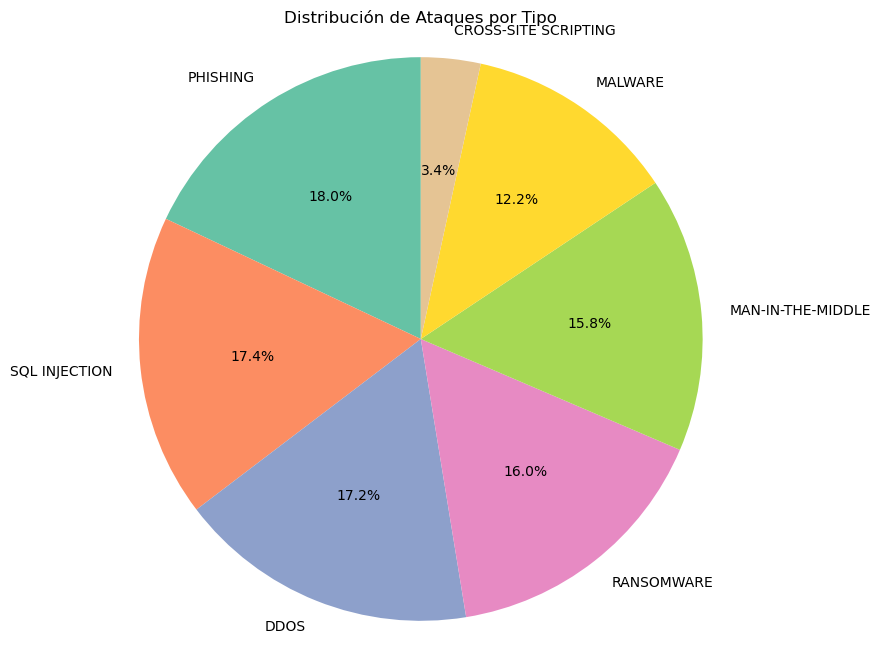

In [37]:

cantidad_tipo_ataques = df['Tipo ataque'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(cantidad_tipo_ataques, labels=cantidad_tipo_ataques.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(cantidad_tipo_ataques)))
plt.title("Distribución de Ataques por Tipo")
plt.axis('equal')
plt.show()


Tipo vulnerabilidad
ZERO-DAY              948
SOCIAL ENGINEERING    920
WEAK PASSWORDS        887
UNPATCHED SOFTWARE    869
MISCONFIGURATION      184
Name: count, dtype: int64

NUMERO DE INCIDENTES POR TIPO DE VULNERABILIDAD

Tipo vulnerabilidad
ZERO-DAY              948
SOCIAL ENGINEERING    920
WEAK PASSWORDS        887
UNPATCHED SOFTWARE    869
MISCONFIGURATION      184
Name: count, dtype: int64


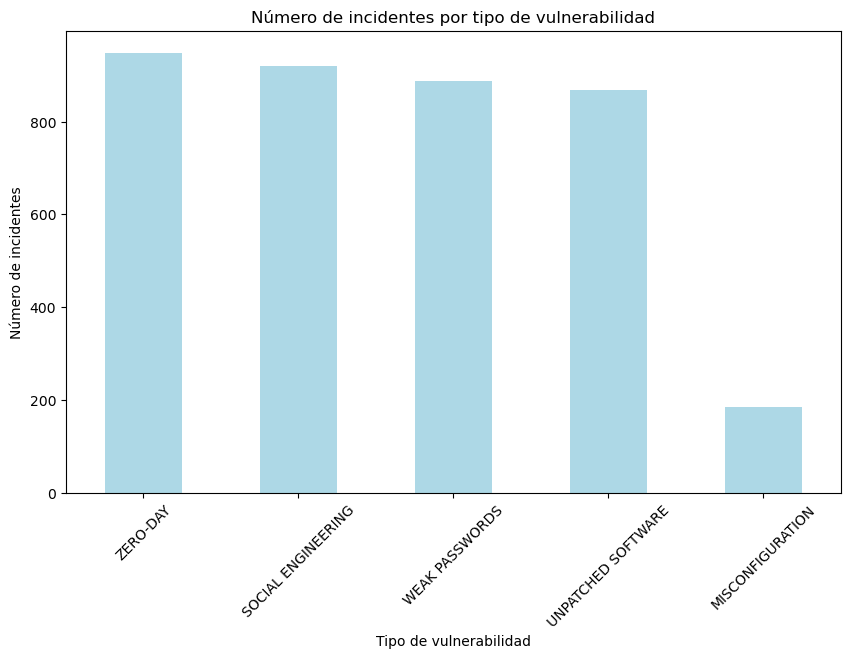

In [38]:
incidentes_por_vulnerabilidad = df['Tipo vulnerabilidad'].value_counts()

print(incidentes_por_vulnerabilidad)


plt.figure(figsize=(10,6))
incidentes_por_vulnerabilidad.plot(kind='bar', color='lightblue')
plt.title('Número de incidentes por tipo de vulnerabilidad')
plt.xlabel('Tipo de vulnerabilidad')
plt.ylabel('Número de incidentes')
plt.xticks(rotation=45)
plt.show()


SE FILTRA POR TIEMPO DE RESOLUCION MAYOR A UNO, EN HORAS CREO QUE ES (VERIFICAR DONDE SE IMPORTA LOS DATOS) Y SE CUENTA POR AÑO

SEGUN TIEMPO DE RESOLUCION

In [39]:
eventos_criticos = df[df['Tiempo de resolución'] > 1]
eventos_por_año = eventos_criticos['Año'].value_counts().sort_index()


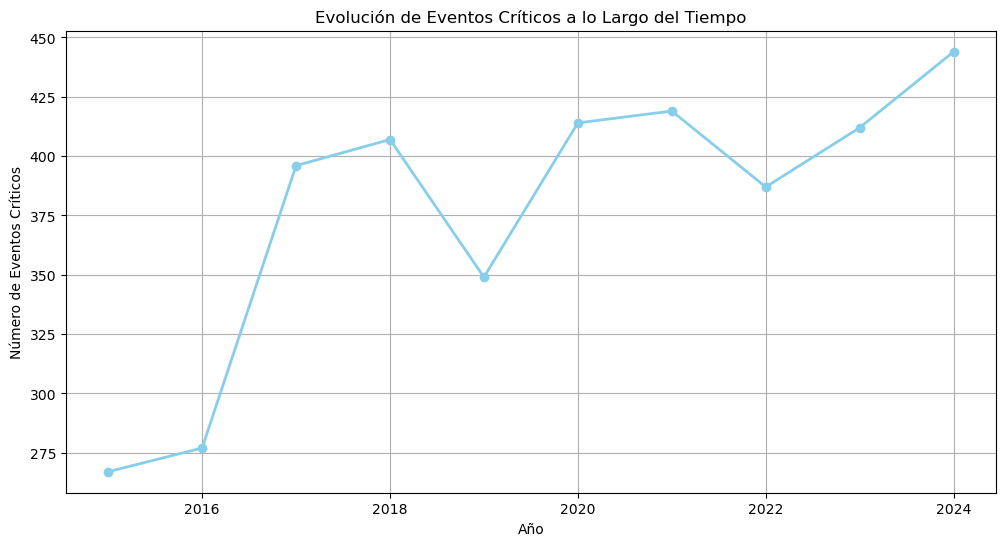

In [40]:

plt.figure(figsize=(12,6))
eventos_por_año.plot(kind='line', marker='o', color='skyblue', linewidth=2)
plt.title("Evolución de Eventos Críticos a lo Largo del Tiempo")
plt.xlabel("Año")
plt.ylabel("Número de Eventos Críticos")
plt.grid(True)
plt.show()


SE MUESTRA 10 REGISTROS ALEATORIOS y  SE GUARDA EN LA VARIABLE DATOS

In [41]:
datos = df.sample(10)
datos

,País,Año,Tipo ataque,Industria objetivo,Pérdida financiera,Número usuarios afectados,Origen ataque,Tipo vulnerabilidad,Mecanismo defensa,Tiempo de resolución
3291,CHINA,2018,RANSOMWARE,IT,12.107574,98167,HACKER GROUP,MISCONFIGURATION,VPN,65.0
2293,BRAZIL,2017,MAN-IN-THE-MIDDLE,GOVERNMENT,68.030000,403770,HACKER GROUP,WEAK PASSWORDS,ENCRYPTION,22.0
1029,INDIA,2015,MAN-IN-THE-MIDDLE,BANKING,97.280000,694308,NATION-STATE,WEAK PASSWORDS,VPN,66.0
2528,INDIA,2024,PHISHING,RETAIL,92.480000,32067,INSIDER,UNPATCHED SOFTWARE,ANTIVIRUS,19.0
236,BRAZIL,2016,SQL INJECTION,EDUCATION,55.830000,758258,UNKNOWN,ZERO-DAY,ENCRYPTION,44.0
1577,GERMANY,2024,MAN-IN-THE-MIDDLE,EDUCATION,26.580000,313397,HACKER GROUP,SOCIAL ENGINEERING,AI-BASED DETECTION,36.0
1442,BRAZIL,2021,SQL INJECTION,IT,34.320000,673923,HACKER GROUP,UNPATCHED SOFTWARE,ENCRYPTION,3.0
2383,GERMANY,2022,MAN-IN-THE-MIDDLE,TELECOMMUNICATIONS,0.540000,419912,NATION-STATE,ZERO-DAY,AI-BASED DETECTION,40.0
843,INDIA,2015,PHISHING,HEALTHCARE,76.080000,471550,UNKNOWN,ZERO-DAY,VPN,5.0
691,RUSSIA,2015,DDOS,BANKING,40.640000,259321,NATION-STATE,SOCIAL ENGINEERING,AI-BASED DETECTION,62.0


SE CONVIERTE EL DF EN UNA LISTA DE DICCIONARIOS PARA.......

In [42]:
lista_diccionarios = datos.to_dict(orient="records")

print(lista_diccionarios)


[{'País': 'CHINA', 'Año': 2018, 'Tipo ataque': 'RANSOMWARE', 'Industria objetivo': 'IT', 'Pérdida financiera': 12.107573769653573, 'Número usuarios afectados': 98167, 'Origen ataque': 'HACKER GROUP', 'Tipo vulnerabilidad': 'MISCONFIGURATION', 'Mecanismo defensa': 'VPN', 'Tiempo de resolución': 65.0}, {'País': 'BRAZIL', 'Año': 2017, 'Tipo ataque': 'MAN-IN-THE-MIDDLE', 'Industria objetivo': 'GOVERNMENT', 'Pérdida financiera': 68.03, 'Número usuarios afectados': 403770, 'Origen ataque': 'HACKER GROUP', 'Tipo vulnerabilidad': 'WEAK PASSWORDS', 'Mecanismo defensa': 'ENCRYPTION', 'Tiempo de resolución': 22.0}, {'País': 'INDIA', 'Año': 2015, 'Tipo ataque': 'MAN-IN-THE-MIDDLE', 'Industria objetivo': 'BANKING', 'Pérdida financiera': 97.28, 'Número usuarios afectados': 694308, 'Origen ataque': 'NATION-STATE', 'Tipo vulnerabilidad': 'WEAK PASSWORDS', 'Mecanismo defensa': 'VPN', 'Tiempo de resolución': 66.0}, {'País': 'INDIA', 'Año': 2024, 'Tipo ataque': 'PHISHING', 'Industria objetivo': 'RETAIL',

EXPLICAR QUE HACE TODO EL CODIGO, FUNCION POR FUNCION Y AL FINAL A LAS QUE SE LLAMA

In [43]:
# Paso 1: Crear la base de datos y la tabla desde Python
def create_database_and_table():
    try:
        # Conexión al servidor PostgreSQL (sin especificar una base de datos)
        conn = psycopg2.connect(
            user="postgres", # Usuario predeterminado
            password="postgres",
            host="localhost",
            port="5432"
        )
        conn.autocommit = True # Necesario para crear una base de datos
        cursor = conn.cursor()

        # Crear la base de datos "grupo2" si no existe
        cursor.execute("SELECT datname FROM pg_database WHERE datname='grupo2';")
        if not cursor.fetchone():
            cursor.execute("CREATE DATABASE grupo2;")
            print("Base de datos 'grupo2' creada correctamente.")
        else:
            print("La base de datos 'grupo2' ya existe.")

        # Cerrar la conexión inicial
        cursor.close()
        conn.close()

        # Conectar a la nueva base de datos
        conn = psycopg2.connect(
        database="grupo2",
        user="postgres",
        password="postgres",
        host="localhost",
        port="5432"
        )
        cursor = conn.cursor()

        # Crear la tabla "structured_logs" si no existe
        cursor.execute("""
        CREATE TABLE IF NOT EXISTS ataque_registros (
            id SERIAL PRIMARY KEY,
            pais VARCHAR(100),
            anio INT,
            tipo_ataque VARCHAR(100),
            industria_objetivo VARCHAR(100),
            perdida_financiera DECIMAL(10, 2),
            numero_usuarios_afectados INT,
            origen_ataque VARCHAR(100),
            tipo_vulnerabilidad VARCHAR(100),
            mecanismo_defensa VARCHAR(100),
            tiempo_resolucion DECIMAL(10, 2)
        );

        """)
        print("Tabla 'ataque_registros' creada correctamente.")

        # Confirmar cambios y cerrar la conexión
        conn.commit()
        cursor.close()
        conn.close()

    except Exception as e:
        print(f"Error al crear la base de datos o la tabla: {e}")

def insert_ataque_registros():
    try:
        # Conectar a la base de datos
        conn = psycopg2.connect(
        database="grupo2",
        user="postgres",
        password="postgres",
        host="localhost",
        port="5432"
        )
        cursor = conn.cursor()

        # Insertar registros en la tabla
        for log in lista_diccionarios:
            cursor.execute("""
            INSERT INTO ataque_registros (pais, anio, tipo_ataque, industria_objetivo, perdida_financiera, 
                numero_usuarios_afectados, origen_ataque, tipo_vulnerabilidad, 
                mecanismo_defensa, tiempo_resolucion)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
            """, (
                log['País'],
                log['Año'],
                log['Tipo ataque'],
                log['Industria objetivo'],
                log['Pérdida financiera'],
                log['Número usuarios afectados'],
                log['Origen ataque'],
                log['Tipo vulnerabilidad'],
                log['Mecanismo defensa'],
                log['Tiempo de resolución']
            ))

        # Confirmar cambios y cerrar la conexión
        conn.commit()
        print("Datos estructurados insertados correctamente.")
        cursor.close()
        conn.close()

    except Exception as e:
        print(f"Error al insertar datos estructurados: {e}")

# Paso 3: Guardar logs no estructurados en un archivo JSON
def save_unstructured_logs():
    try:

        # Guardar logs en un archivo JSON
        with open("ataque_registros.json", "w") as file:
            json.dump(lista_diccionarios, file, indent=4)

        print("Logs no estructurados guardados en 'ataque_registros.json'")

    except Exception as e:
        print(f"Error al guardar logs no estructurados: {e}")

# Ejecutar todas las funciones
if __name__ == "__main__":
    create_database_and_table() # Crear base de datos y tabla
    insert_ataque_registros() # Insertar datos estructurados
    save_unstructured_logs() # Guardar logs no estructurados

La base de datos 'grupo2' ya existe.
Tabla 'ataque_registros' creada correctamente.
Datos estructurados insertados correctamente.
Logs no estructurados guardados en 'ataque_registros.json'


CONCLUSIONES...
1.
2.
3.

RECOMENDACIONES...
1.
2.
3.